## 前準備

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# CSVファイルの読み込み
titanic_df = pd.read_csv('train.csv')

# データの先頭を確認する
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* データ項目の確認を行う
 - SibSp　= 兄弟がいたかどうか
 - Parch = 親子だったかどうか など

In [3]:
# データのサマリーを確認するメソッド　データ名.info()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 可視化して傾向を掴む
---

In [4]:
# 各メソッドについての概要をまとめよう！
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 描画したいグラフをブラウザで表示させるためのコード（要確認）
%matplotlib inline

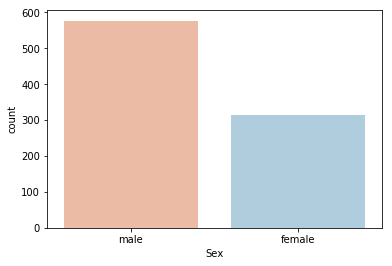

In [5]:
# countplotメソッド　= データの件数を集計し、ヒストグラムとして出力
#　乗客は男女どちらが多いか?
# countplot('列名', 参照するデータファイル名)

sns.countplot('Sex' ,data=titanic_df, palette='RdBu')

### 1.タイタニック号の乗客はどのような人達だったのか？
---
どのような　= 性別から特徴・傾向を調べる =　性別で要素の数を比較する

** 結論 **
男性客のほうが女性客の2倍以上乗船していた

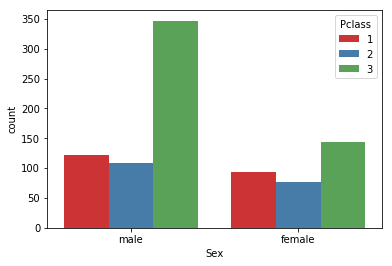

In [6]:
#　男女だけでなく客室別に表示させる
# hue　はカテゴリごとに'層別化'という意味。今回は客室ごとに色分けするという指示
# sns.countplot('比較したい列名' ,取得データ名, hue='層別化したい列名')

sns.countplot('Sex' ,data=titanic_df, hue='Pclass', palette='Set1')

### 1.タイタニック号の乗客はどのような人達だったのか？
---
どのような　= 性別だけでなく、客室ごとに特徴・傾向はあるか？

** 結論 **
男性客の特に3等室の乗客数が多かった

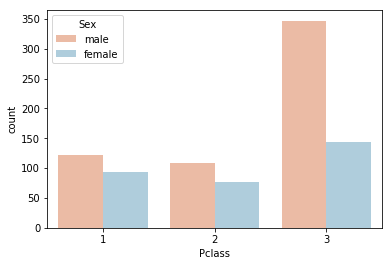

In [7]:
# 客室ごとにヒストグラムを作り、男女差を色分けする
sns.countplot('Pclass' ,data=titanic_df, hue='Sex' ,palette='RdBu')

In [8]:
# こどもがどれくらい乗船していたかを調べる
# しかし、こどもというラベルは存在しない。年齢データはある
# 年齢のデータをもとに、こどもというラベルを定義する

# 16歳未満の場合は「こども」、それ以外（大人）は性別を返す（表示）

# def 任意の関数名(取得したい要素がある列名)
def male_female_child(passenger):
    # 性別と年齢に分ける?という意味らしい?
    age, sex = passenger
    # 16歳未満はこどもであると定義する
    if age < 16:
        return 'child'
    # 16歳以上の大人は性別を返す
    else:
        return sex

# titanic_dfというデータに[person]という名前の新しい列を追加する
# データ名['カテゴリ名'] で新しい列を追加
# 
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

# 正しく新しい列が追加されているかを確認するために、データを表示する
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


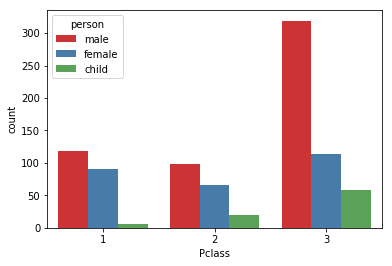

In [9]:
# 客室ごとに、男女・こどもの乗客数に違いがあるのかを確かめる
# 客室ごとに比較し、性別・こどもごとに層別化する

sns.countplot('Pclass' , data=titanic_df, hue='person', palette='Set1')

### ヒストグラムを表示する
---

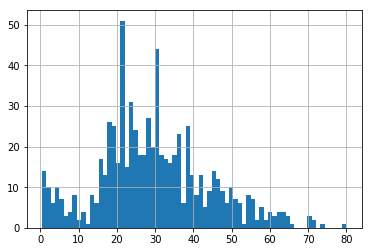

In [10]:
# pandasのDataFrameで簡単にヒストグラムを描く方法
# binsは正しい数というのは存在しない

titanic_df['Age'].hist(bins=70)

### 平均年齢を求める
---
ヒストグラムから平均年齢が20~30代あたりであることがわかったので、
具体的な数値を求めることによって、明確化する

**結論** 平均年齢は29.6歳である

In [11]:
# ヒストグラムで大体の中央値がわかったので、具体的な数値を求めてみる
# 平均年齢を調べる　mean()メソッド
titanic_df['Age'].mean()

29.69911764705882

### 属性ごとの個数を求める
---
男性客が多く、こどもが少ないことはわかったので、
具体的な数値を求めることによって、明確化する

**結論** 

男性:537名, 女性:271名, こども83名である

In [12]:
# value_counts()メソッドを使うことによって、列内のカテゴリごとに数値を算出できる
#  personという列内の「男性、女性、こども」の個数を算出する
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### カーネル密度推定(略称 KDE)
---
Kernerl density estimation
確率変数の確率密度関数を推定する

** ざっくり言うと... **

* なめらかなヒストグラム
* 通常のヒストグラムにおいて、複数の突出(peak)がある場合に、異なる複数の母集団から標本が抽出されている可能性がわかる
* 複数のカーネル密度分布を足し合わせた時に、視覚的な比較優位をとることができる

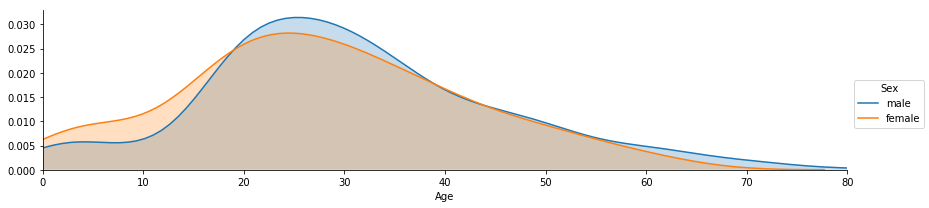

In [13]:
# カーネル密度推定を用いて、わかりやすい視覚表現を試みる
# seabornのFacetGridメソッドを用いる
# 一つのグラフに、いくつかのプロットが描ける

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
# mapメソッド　Ageについてカーネル密度推定(kdeplot)するよ
fig.map(sns.kdeplot, 'Age', shade=True)

# 推定なので、0歳未満(マイナス)や乗客の最高齢よりも大きな値がでる可能性があるため、それを取り除く

#最高齢の数値(最大値)をAge列から取得
oldest = titanic_df['Age'].max()

# 最小値0　最大値=最高齢のグラフとして設定する
fig.set(xlim=(0,oldest))

# legend()メソッドで、凡例を追加する（青色が男性で、オレンジが女性）
fig.add_legend()

### こどもも含めて(person)カーネル密度推定をおこなう
---

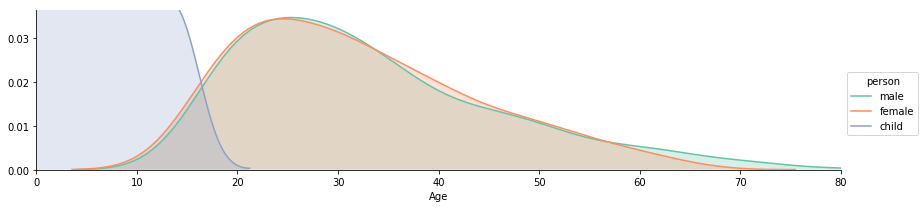

In [14]:
# カーネル密度推定を用いて、わかりやすい視覚表現を試みる
# seabornのFacetGridメソッドを用いる
# 一つのグラフに、いくつかのプロットが描ける

fig = sns.FacetGrid(titanic_df, hue='person', aspect=4 ,palette='Set2')
# mapメソッド　Ageについてカーネル密度推定(kdeplot)するよ
fig.map(sns.kdeplot, 'Age', shade=True)

# 推定なので、0歳未満(マイナス)や乗客の最高齢よりも大きな値がでる可能性があるため、それを取り除く

#最高齢の数値(最大値)をAge列から取得
oldest = titanic_df['Age'].max()

# 最小値0　最大値=最高齢のグラフとして設定する
fig.set(xlim=(0,oldest))

# legend()メソッドで、凡例を追加する（青色が男性で、オレンジが女性）
fig.add_legend()

### 等室(Pclass)を元にカーネル密度推定をおこなう
---
** わかること **

客室レベルが下がるにつれて、乗客の年齢も下がっている
当時から、若い人ほどお金を持っていなかったことがわかる

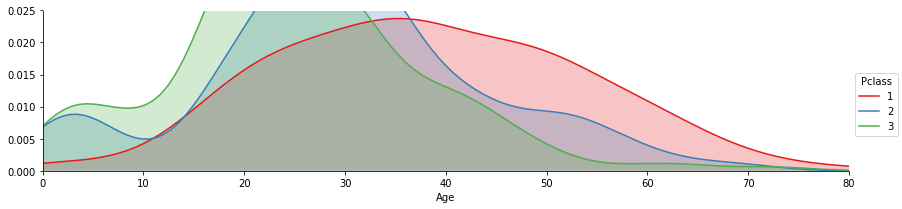

In [15]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4 ,palette='Set1')
# mapメソッド　Ageについてカーネル密度推定するよ
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### 2.乗っていたキャビンの状況はどうだったか？
---

In [16]:
## データの表示
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


#### Cabin列を見てみると、NaN(Not at Number , Null値)が多い
---
null値を取り除く処理をおこなう

In [17]:
# deckという新しい変数を定義し、元データからCabinを取得し、dropna()メソッドを用いる
deck = titanic_df['Cabin'].dropna()

In [18]:
# データの種類を確認する
type(deck)

pandas.core.series.Series

In [19]:
# deckの表示
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [20]:
# 数字は大体の場所なので、キャビンの高さだけ知りたい場合は、頭文字だけとればよい

# levelという新しいリストを作成する
levels = []

# 要素をlevelとし、要素はdeck列から取得する
for level in deck:
    # levelのデータの一文字目をlevelsというリストに追加する
    levels.append(level[0])

# levelsの表示
levels

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

In [21]:
# cabin_dfという新しいデータフレームを作成する
cabin_df = DataFrame(levels)
# カラム名(Cabin)をつける
cabin_df.columns = ['Cabin']

# 表示
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


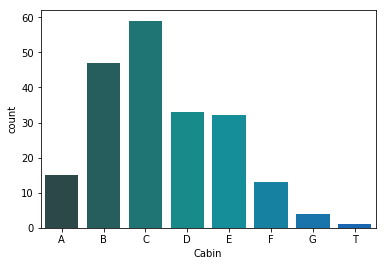

In [22]:
# countplotを用いて、
# paletteで色指定, orderで出力する順番を文字列のリストで指定
sns.countplot('Cabin', data=cabin_df,palette='winter_d', order=sorted(set(levels)))

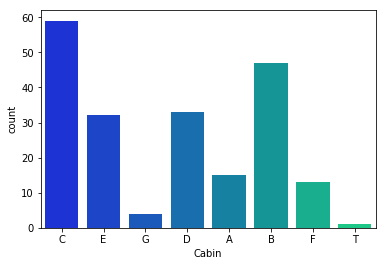

In [23]:
# orederを使用しなかった場合
sns.countplot('Cabin', data=cabin_df,palette='winter')

### 外れ値を取り除く
---
A~Gまでは順番なのに、Tが入っている。
おそらく、Tは入力ミスなのではないか？と推測。

In [24]:
# cabin_dfというDFの中の、CabinというカラムからTではないものを取得
cabin_df = cabin_df[cabin_df.Cabin != 'T']

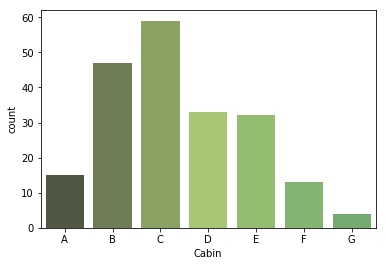

In [25]:
sns.countplot('Cabin', data=cabin_df,palette='summer_d', order=sorted(set(cabin_df.Cabin)))

 ### 乗客がどこから乗船したのか？を調べる
 ---
 ** わかったこと **
 
 * Q(クイーンズタウン)からの乗船客はほとんど3等室の人たちであった

In [26]:
# データ内容の確認
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


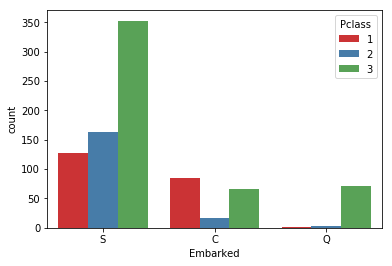

In [27]:
sns.countplot('Embarked', data=titanic_df, hue='Pclass', palette='Set1')

### seabornの注意事項
---
* Null値に対して、自動対応してくれる（してしまう）

** 実は、null値が2つ存在している **

In [28]:
from collections import Counter

In [29]:
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

### 乗客の属性をくわしく分析する
---


In [30]:
# Alone(単身者)というカラムを作成 = 親子ではない　+ 兄弟姉妹ではない
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [31]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'
# 警告は現時点で気にしなくてよい

/Users/h-fukano/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
# カラムAloneが追加され、文字列が記入されている
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


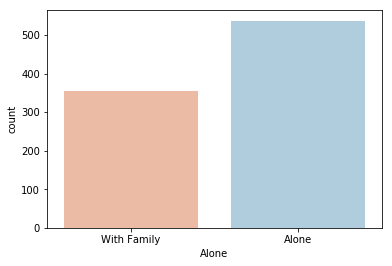

In [33]:
# countplotを用いて、単身者と家族連れの数値を比較する
sns.countplot('Alone', data=titanic_df, palette='RdBu')

** わかったこと **:単身者のほうがやや多い

### タイタニック号から生還した人はどんな人！？
---
** 結論 **

* １等客室のほうが3等客室よりも生存率が高い
 - お金持ちの方が生還できている
 

In [34]:
# Survivor生還者というカラムを新たに追加
# すでにSurvivedというカラムに0,1で入力されているものを、no,yesに変更

titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

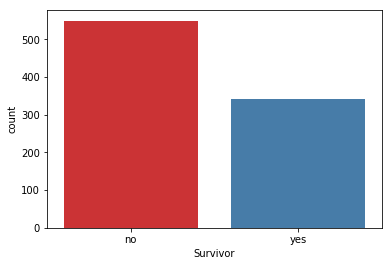

In [35]:
sns.countplot('Survivor', data=titanic_df, palette='Set1')

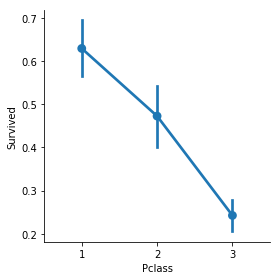

In [36]:
# factorplot
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1,2,3])

#### 結論: 1等客室の方が3等客室よりも生存率が高い

### 女性とこどもは優先的に救われたか？
---

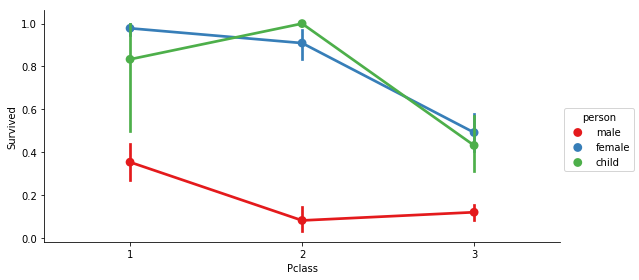

In [37]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, order=[1,2,3], aspect=2, palette='Set1')

#### 結論
---
等室レベルは関係しているものの、女性とこどもの生存率は男性と比較すると、差が少ない

** 優先的に救助されたということがわかる **

### 年齢と生存率の相関性を調べる
---
** 結論 **

全体でみると、高齢になるほど生存率は下がっている

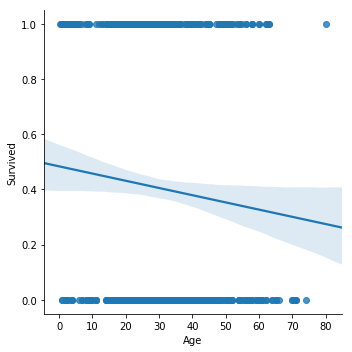

In [38]:
# lmplotメソッドにより、回帰直線とプロットをおこなう
sns.lmplot('Age', 'Survived', data=titanic_df)

#### 客室レベルごとに層別化する
---
年齢が若いほど生存率は高くなっているが、**同じ年齢であれば等室レベルが高い方が生存率が高い**

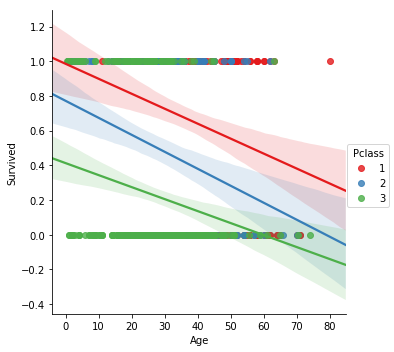

In [39]:
# lmplotメソッドにより、回帰直線とプロットをおこなう
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='Set1', hue_order=[1,2,3])

#### 客室レベルで層別化し、年齢ごとに生存率を比較する
---
高齢者の標準偏差??が高いことから、**高齢であったが偉い乗客がいて、真っ先に救われたのではないか**と考えられる

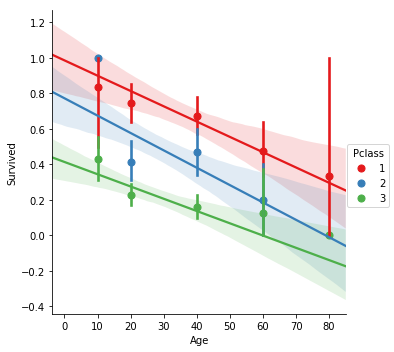

In [40]:
# プロットを年代ごとにまとめる
generations = [10,20,40,60,80]
# lmplotメソッドにより、回帰直線とプロットをおこなう
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='Set1', 
           hue_order=[1,2,3], x_bins=generations)

#### 性別で層別化してみる
---
女性は年齢があがるほど、生存率が高くなっている

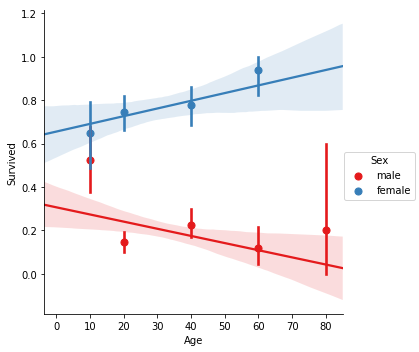

In [41]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='Set1', x_bins=generations)

# 機械学習使ってみる
---
1. データの概要を確認して、可視化、処理・整形
    - データを分割する
    - 説明変数と目的変数を明確にする
2. 分類の選定
    - ランダムフォレスト
    - ロジスティック回帰
    - SVM


## 1.ライブラリのインポートとデータ概要の確認
---
* 文字列を削除した
* Survived(生存1 死亡0)のカラムを最終列に移動した
* 上記のデータをtrain2.csvとして保存した

In [42]:
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('train2.csv')
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,1,22.0,1,0,0
1,1,0,38.0,1,0,1
2,3,0,26.0,0,0,1
3,1,0,35.0,1,0,1
4,3,1,35.0,0,0,0
5,3,1,NaN,0,0,0
6,1,1,54.0,0,0,0
7,3,1,2.0,3,1,0
8,3,0,27.0,0,2,1
9,2,0,14.0,1,0,1


In [43]:
df.dropna()

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,1,22.0,1,0,0
1,1,0,38.0,1,0,1
2,3,0,26.0,0,0,1
3,1,0,35.0,1,0,1
4,3,1,35.0,0,0,0
6,1,1,54.0,0,0,0
7,3,1,2.0,3,1,0
8,3,0,27.0,0,2,1
9,2,0,14.0,1,0,1
10,3,0,4.0,1,1,1


### 【エラーが出たので、データを整形?】
####  欠測値によりエラーが出たため、dropna()で欠測値のある行を削除
---
これをdf2として新たにDataFrameを作成した

In [44]:
df2 = df.dropna()
df2

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,1,22.0,1,0,0
1,1,0,38.0,1,0,1
2,3,0,26.0,0,0,1
3,1,0,35.0,1,0,1
4,3,1,35.0,0,0,0
6,1,1,54.0,0,0,0
7,3,1,2.0,3,1,0
8,3,0,27.0,0,2,1
9,2,0,14.0,1,0,1
10,3,0,4.0,1,1,1


## 2.説明変数Xと目的変数yを定義する
---
* df２の全ての行(:)と最後の列(:-1)をのぞく列を代入
    - つまり生存結果だけを説明変数から除いた
* df2の全ての行(:)と最後の列(-1)だけを代入
    - 目的変数=生存結果であるため

In [45]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

### sklearnのtrain_test_splitを利用して、データを分割
---
トレーニングデータ(70%)、テストデータ(30%)と指定した

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [47]:
import numpy as np
from sklearn.model_selection import cross_val_score

### A.ランダムフォレストで分析する
---

In [48]:
from sklearn.ensemble import RandomForestClassifier

# max_depth=3, 5, 8, n_estimators=5, 8, 10を試した
forest = RandomForestClassifier(
    max_depth=8, n_estimators=10, random_state=0,
)
scores = cross_val_score(forest, X_train, y_train, cv=10)

print("正答率", np.mean(scores), "標準偏差 +/-", np.std(scores))

正答率 0.803714285714 標準偏差 +/- 0.0468266451273


### B.ロジスティック回帰で分析する
---

In [49]:
# ロジスティック回帰

from sklearn.linear_model import LogisticRegression

# C=0.01, 0.1, 1, 10, 100を試した
lr = LogisticRegression(C=0.01)
scores = cross_val_score(lr, X_train, y_train, cv=10)

print("正答率", np.mean(scores), "標準偏差 +/-", np.std(scores))

正答率 0.635265306122 標準偏差 +/- 0.038768291487


### C.SVM(SVC)で分析する
---

In [50]:
# SVC

from sklearn.svm import SVC

# C=0.01, 1, 100, gamma=0.01, 1, 100を試した
svm = SVC(C=1, gamma=0.01)
scores = cross_val_score(svm, X_train, y_train, cv=10)

print("正答率", np.mean(scores), "標準偏差 +/-", np.std(scores))

正答率 0.787714285714 標準偏差 +/- 0.0534377379455


In [51]:
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.79534883720930227

## 【結論】ランダムフォレストが良いかも?
---
正答率が80%を切っているため、精度は悪い・・・
データの整形が悪かったと思う

In [52]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [53]:
forest.score(X_test, y_test)

0.79534883720930227

## おまけ 重回帰分析から説明変数の影響度を調べる
---

In [54]:
import sklearn
from sklearn.linear_model import LinearRegression

In [55]:
lreg = LinearRegression()

In [56]:
X_titanic = df2.drop('Survived',1)
y_titanic = df2.Survived

In [57]:
# モデル生成
lreg.fit(X_titanic,y_titanic)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
print('切片の値は{:0.2f}'.format(lreg.intercept_))

切片の値は1.40


In [59]:
print('係数の数は{}個'.format(len(lreg.coef_)))

係数の数は5個


In [60]:
# 新しいDataFrameを作成
df3 = DataFrame(df2.columns)
df3.columns = ['Features']

#求められた係数を代入
df3["Coefficient Estimate"] = pd.Series(lreg.coef_)

df3

,Features,Coefficient Estimate
0,Pclass,-0.205147
1,Sex,-0.489797
2,Age,-0.006588
3,SibSp,-0.051687
4,Parch,-0.008990
5,Survived,NaN


# 説明変数(特徴量)の影響度
---
どれもマイナスじゃん・・・
一応

## 1.年齢(Age)
若い人ほど救われているから?

## 2.親子(Parch)
こどもの生存率が高いから？
また、高齢者は独り身が多かったから?

## 3.等室(Pclass)
偉い人がいい部屋にいたから?

## 4.性別(Sex)
女性の方が男性より救われているから?

## 5.兄弟姉妹の有無(SibSp)
そりゃ、優先度低いよなぁ〜


# 分析結果
---
## 1. タイタニック号はこどもと女性が優先的に救助されたという方針は正しく行われていた
## 2. 性別よりも、等室レベルが高いほうが優先的に救助されていたこともわかった


# 考察
---
## 1. いつの時代も「お金持ち」は「偉い」ので生存率が高い
## 2. 生き残りたくて仕方のない男性は、窮地に陥った時に生き残るために「お金持ち」を目指すべき

# 反省
---
## 1. データの前処理・整形のほうが難しい（カテゴリ変数を数値に直すとか）
## 2. 元データが使いづらくて挫折することが多かった
    ### （一つのCSVファイルだと面白い分析はできないかもって思った）